In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
train_path = 'C:\\Users\\hamza jamil\\Desktop\\All dcouemnnt\\Malaria Detection\\images-data\\Train'
valid_path = 'C:\\Users\\hamza jamil\\Desktop\\All dcouemnnt\\Malaria Detection\\images-data\\Test'

In [5]:
# useful for getting number of output classes
folders = glob('C:\\Users\\hamza jamil\\Desktop\\All dcouemnnt\\Malaria Detection\\images-data\\Train//*')
len(folders)

2

In [7]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)            

In [8]:

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [9]:

# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('C:\\Users\\hamza jamil\\Desktop\\All dcouemnnt\\Malaria Detection\\images-data\\Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 22 images belonging to 2 classes.


In [11]:
test_set = test_datagen.flow_from_directory('C:\\Users\\hamza jamil\\Desktop\\All dcouemnnt\\Malaria Detection\\images-data\\Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 22 images belonging to 2 classes.


In [12]:
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
Epoch 1/5
1/1 [==============================] - 7s 7s/step - loss: 0.6918 - acc: 0.5455 - val_loss: 2.9536 - val_acc: 0.5000
Epoch 2/5
Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 2.7350 - acc: 0.5000 - val_loss: 2.7126 - val_acc: 0.5000
Epoch 3/5
Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 3.0462 - acc: 0.5000 - val_loss: 1.7891 - val_acc: 0.5000
Epoch 4/5
Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 1.8533 - acc: 0.5000 - val_loss: 0.7479 - val_acc: 0.5000
Epoch 5/5
Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 0.6915 - acc: 0.5455 - val_loss: 1.0302 - val_acc: 0.5000


In [13]:
from tensorflow.keras.models import load_model

model.save('Malaria_model.h5')

In [14]:
model.predict(test_set)

array([[0.83546996, 0.16453007],
       [0.7522778 , 0.24772222],
       [0.8734906 , 0.12650935],
       [0.79163516, 0.2083648 ],
       [0.8279024 , 0.17209761],
       [0.81355447, 0.18644556],
       [0.84259933, 0.15740071],
       [0.8381222 , 0.16187781],
       [0.8200802 , 0.17991981],
       [0.87129205, 0.12870793],
       [0.7380759 , 0.26192406],
       [0.87620866, 0.12379131],
       [0.7865106 , 0.21348944],
       [0.8395835 , 0.16041654],
       [0.85649586, 0.1435041 ],
       [0.8351334 , 0.16486663],
       [0.82547927, 0.17452072],
       [0.87582016, 0.12417985],
       [0.796915  , 0.20308498],
       [0.8434726 , 0.15652746],
       [0.7500407 , 0.24995935],
       [0.88193226, 0.11806775]], dtype=float32)

In [17]:

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
modell=load_model('C:\\Users\\hamza jamil\\Malaria_model.h5')
modell

In [18]:
modell.predict(test_set)

array([[0.88193226, 0.11806775],
       [0.796915  , 0.20308498],
       [0.87582016, 0.12417985],
       [0.8434726 , 0.15652746],
       [0.8279024 , 0.17209761],
       [0.83546996, 0.16453007],
       [0.8381222 , 0.16187781],
       [0.81355447, 0.18644556],
       [0.7522778 , 0.24772222],
       [0.79163516, 0.2083648 ],
       [0.84259933, 0.15740071],
       [0.87129205, 0.12870793],
       [0.8200802 , 0.17991981],
       [0.7865106 , 0.21348944],
       [0.8395835 , 0.16041654],
       [0.8351334 , 0.16486663],
       [0.8734906 , 0.12650935],
       [0.87620866, 0.12379131],
       [0.82547927, 0.17452072],
       [0.7500407 , 0.24995936],
       [0.85649586, 0.1435041 ],
       [0.7380759 , 0.26192406]], dtype=float32)

In [19]:
img=image.load_img(r'C:\Users\hamza jamil\Downloads\Malaria deteection modle\Malaria-Detection-master\Dataset\Train\Uninfected\C1_thinF_IMG_20150604_105100_cell_43.png',target_size=(224,224))

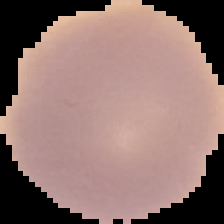

In [20]:
img

In [21]:
x=image.img_to_array(img)
x


array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [23]:
from pandas.testing import assert_frame_equal
x.shape

(224, 224, 3)

In [24]:
x=x/255

In [25]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [26]:
modell.predict(img_data)

array([[1., 0.]], dtype=float32)

In [28]:

a=np.argmax(modell.predict(img_data), axis=1)
a

array([0], dtype=int64)

In [30]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected
